# Sales Analysis

In [4]:
import pandas as pd
import os
import glob

## Merging 12 months Sales Data into single csv file

In [5]:
path = "./Sales_Data"
files = [file for file in os.listdir(path)]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)

In [6]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.0,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the Data !

#### Drop rows of Nan

In [7]:
#To-check for Nan values
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data.dropna(how='all',inplace = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.0,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
all_data = all_data[all_data['Order ID'].str[0:2] != 'Or']

#### Make Columns correct type


In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [11]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### Adding additional columns to the data

In [12]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month

In [13]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x : x.split(",")[1]+" "+(x.split(",")[2]).split(" ")[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA
3,176560.0,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
4,176560.0,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA


###  1.What was the best month for sales? how much was earned that month?

In [24]:
all_data['Order Price'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,Order Price,Hour,Minute
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX,23.90,8,46
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99.99,22,30
3,176560.0,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00,14,38
4,176560.0,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,14,38
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,9,27


In [25]:
sales_data_months= all_data.groupby('Month').sum('Order Price')

sales_data_months.dtypes


Quantity Ordered    float64
Price Each          float64
Order Price         float64
Hour                  int64
Minute                int64
dtype: object

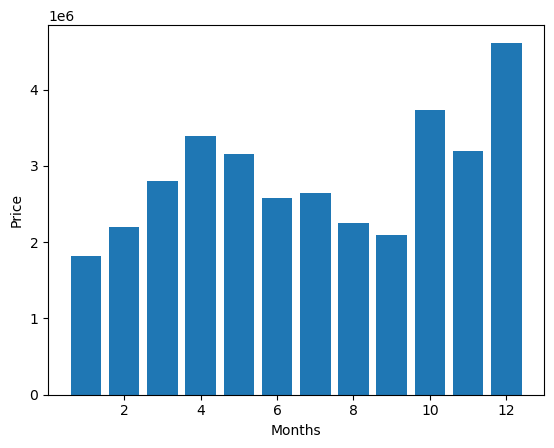

In [26]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,sales_data_months['Order Price'])
plt.xlabel('Months')
plt.ylabel('Price')
plt.show()


###  2.Which city had the highest number of sales

In [27]:
city_data = all_data.groupby('city').sum('Order Price')
city_data['Order Price']

city
 Atlanta GA          2795502.42
 Austin TX           1819841.74
 Boston MA           3661642.01
 Dallas TX           2767975.40
 Los Angeles CA      5452573.79
 New York City NY    4664617.42
 Portland ME          449758.27
 Portland OR         1870732.34
 San Francisco CA    8262218.89
 Seattle WA          2747755.48
Name: Order Price, dtype: float64

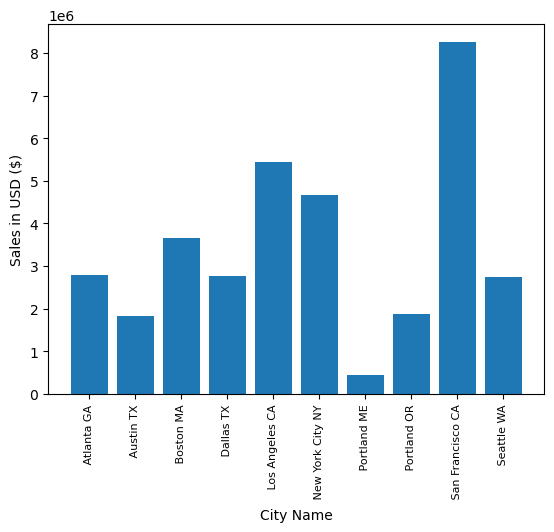

In [28]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('city')]
# cities = all_data['city'].unique()
plt.bar(cities,city_data['Order Price'])
plt.xticks(cities, rotation ='vertical', size=8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.show()


### 3.What time should we display advertisements to maximize likelihood of customer's buying product?

In [29]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,Order Price,Hour,Minute
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas TX,23.90,8,46
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston MA,99.99,22,30
3,176560.0,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00,14,38
4,176560.0,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,14,38
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,9,27


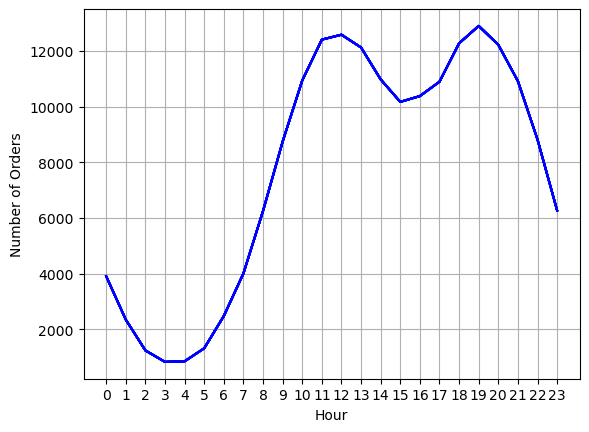

In [48]:
hours = [hour for hour,df in all_data.groupby('Hour') ]
count = all_data.groupby('Hour').count()

plt.plot(hours,count,color='b')
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


#### **From the above plot, The peak number of orders are at 11am and 7pm - the right time to display advertisements to maximize likelihood of customer's buying product would be before 11am and after 7pm

### 4: What products are most often sold together?

In [32]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,Order Price,Hour,Minute
3,176560.0,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00,14,38
4,176560.0,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,14,38
18,176574.0,Google Phone,1.0,600.00,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles CA,600.00,19,42
19,176574.0,USB-C Charging Cable,1.0,11.95,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles CA,11.95,19,42
30,176585.0,Bose SoundSport Headphones,1.0,99.99,04-07-2019 11:31,"823 Highland St, Boston, MA 02215",4,Boston MA,99.99,11,31


In [33]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\Users\thepa\AppData\Local\Temp\ipykernel_9112\759627908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,Order Price,Hour,Minute,Grouped
3,176560.0,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,600.00,14,38,"Google Phone,Wired Headphones"
4,176560.0,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles CA,11.99,14,38,"Google Phone,Wired Headphones"
18,176574.0,Google Phone,1.0,600.00,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles CA,600.00,19,42,"Google Phone,USB-C Charging Cable"
19,176574.0,USB-C Charging Cable,1.0,11.95,04-03-2019 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles CA,11.95,19,42,"Google Phone,USB-C Charging Cable"
30,176585.0,Bose SoundSport Headphones,1.0,99.99,04-07-2019 11:31,"823 Highland St, Boston, MA 02215",4,Boston MA,99.99,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [34]:
import collections
import itertools

count = collections.Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(collections.Counter(itertools.combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


### 5. What Product sold the most and why do you think it sold the most ?

C:\Users\thepa\AppData\Local\Temp\ipykernel_9112\694171393.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = products_group.sum()['Quantity Ordered']


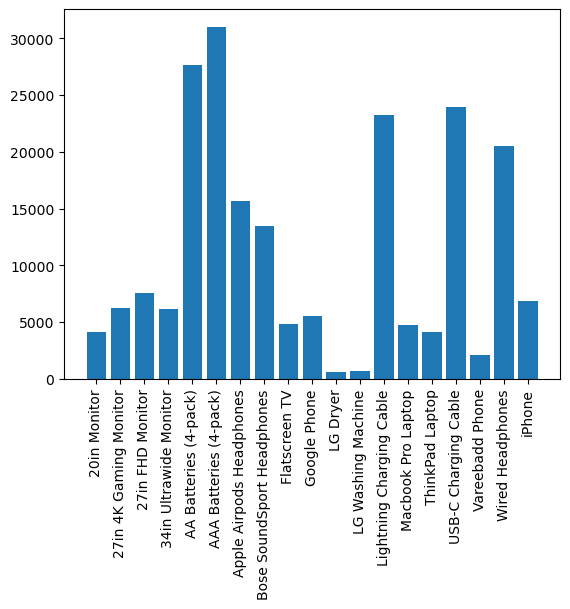

In [35]:
products_group = all_data.groupby('Product')
quantity_ordered = products_group.sum()['Quantity Ordered']
products = [product for product,df in products_group]
plt.bar(products,quantity_ordered)
plt.xticks(products,rotation ='vertical')
plt.show()

C:\Users\thepa\AppData\Local\Temp\ipykernel_9112\761852498.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\thepa\AppData\Local\Temp\ipykernel_9112\761852498.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical')


Text(0, 0.5, 'Prices')

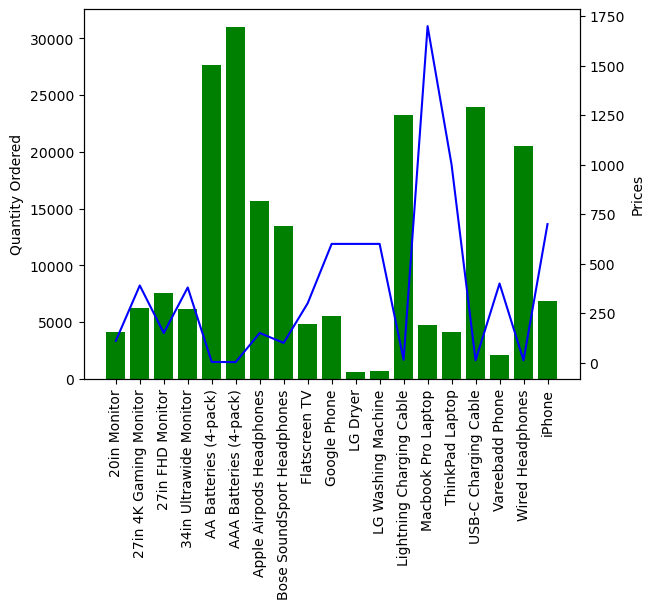

In [36]:
prices = all_data.groupby('Product').mean()['Price Each']
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color = 'g')
ax1.set_xticklabels(products,rotation='vertical')
ax1.set_ylabel('Quantity Ordered')
ax2.plot(products,prices,color='b')
ax2.set_ylabel('Prices')

